**Import necessary libraries**

In [305]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, roc_auc_score, roc_curve, auc, confusion_matrix

**Reading and storing the data.**

In [306]:
raw_data = pd.read_csv('Mall_Customers.csv')

**Data Preprocessing**

In [307]:
# Data Preprocessing
raw_data = raw_data.drop(['CustomerID', 'Gender'], axis=1) # Drop CustomerID

**Exploratory Data Analysis**

<Axes: xlabel='Age', ylabel='Count'>

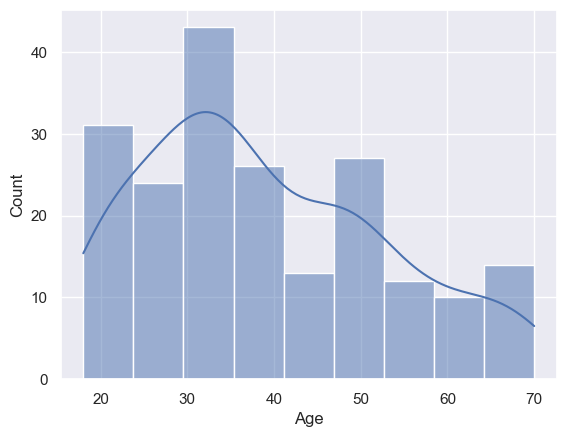

In [308]:
sns.histplot(raw_data['Age'], kde=True)

**Generate descriptive statistics of the raw_data DataFrame**

In [309]:
raw_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


**Check for missing values**

In [310]:
raw_data.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Reordering columns**

In [311]:
raw_data = raw_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
raw_data.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


**Scatter plot between annual income vs spending score**

Text(0.5, 1.0, 'Annual Income vs Spending Score')

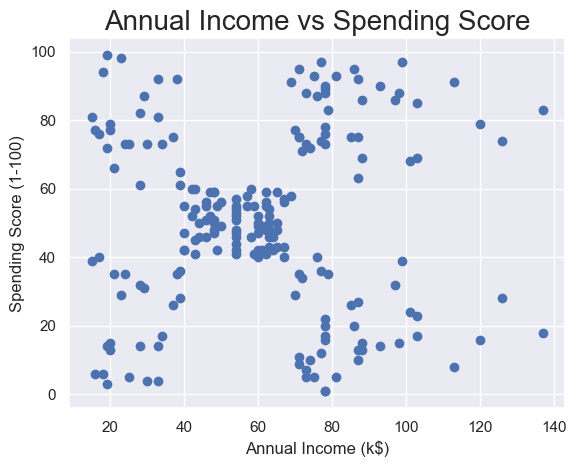

In [312]:
plt.scatter(raw_data['Annual Income (k$)'], raw_data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score', fontsize=20)

**Scatter plot between age vs spending score**

Text(0.5, 1.0, 'Age vs Spending Score')

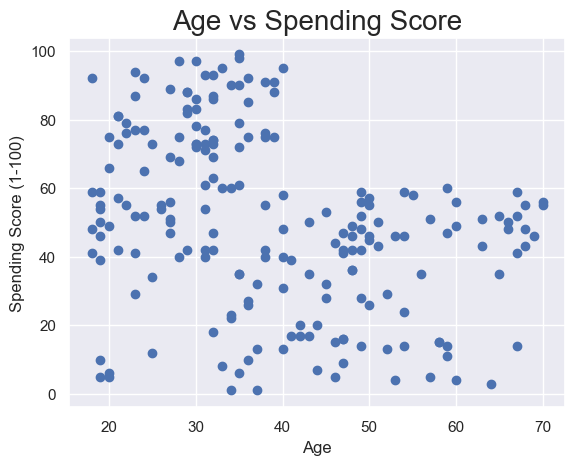

In [313]:
plt.scatter(raw_data['Age'], raw_data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score', fontsize=20)

**Standardizing the data**

In [314]:
# Standardization(Feature Scaling)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(raw_data) # Standardization
scaled_data = pd.DataFrame(scaled_data, columns=raw_data.columns) # Convert to DataFrame

In [315]:
scaled_data.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
5,-1.209269,-1.662660,1.001596
6,-0.276302,-1.624491,-1.715913
7,-1.137502,-1.624491,1.700384
8,1.804932,-1.586321,-1.832378
9,-0.635135,-1.586321,0.846310


**Extracting subsets of scaled_data: one without Age, another without Annual Income, and a full dataset**

In [316]:
data_without_age = scaled_data[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
data_without_income = scaled_data[['Age', 'Spending Score (1-100)']].iloc[:, :].values
data = scaled_data.iloc[:, :].values

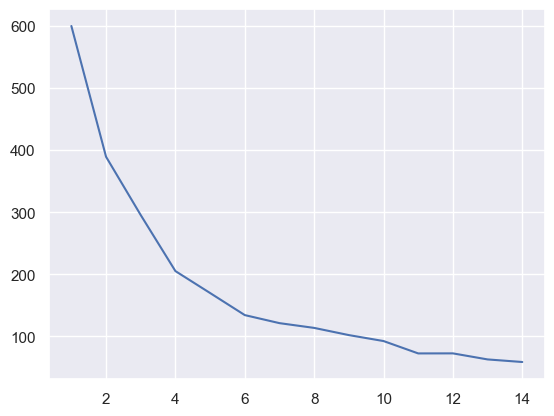

In [317]:
wcss = []

cl_num = 15 #
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# We have it set at 10 right now, but it is completely arbitrary.

for i in range(1, cl_num):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss_iteration = kmeans.inertia_
    wcss.append(wcss_iteration)

number_of_clusters = range(1, cl_num)
plt.plot(number_of_clusters, wcss)

**Segmentation using Age, Annual Income and Spending Score**

Assign cluster predictions using k-means with 5 clusters

In [318]:
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)

kmeans_5.fit(data)

KMeans(n_clusters=5, random_state=42)

In [319]:
clusters_scaled = scaled_data.copy()
clusters_scaled['cluster_pred'] = kmeans_5.fit_predict(scaled_data)
clusters_scaled

,Age,Annual Income (k$),Spending Score (1-100),cluster_pred
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,4
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,4


**Scatter plot of Annual Income versus Spending Score colored by cluster predictions**

Text(0.5, 1.0, 'Annual Income, Age, Spending Score')

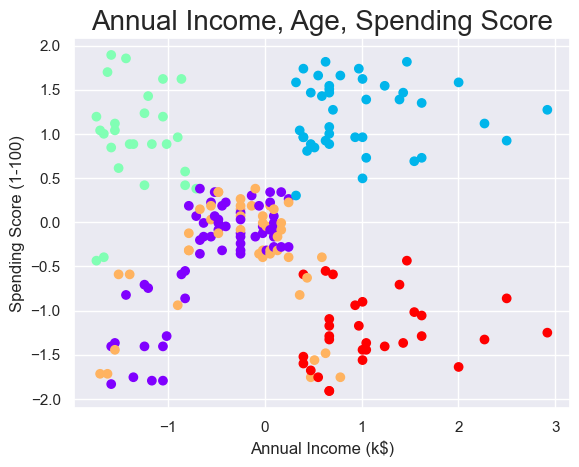

In [320]:
plt.scatter(clusters_scaled['Annual Income (k$)'], clusters_scaled['Spending Score (1-100)'], c=clusters_scaled['cluster_pred'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income, Age, Spending Score', fontsize=20)


**Segmentation using Average Income and Spending Score**

In [321]:
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)

cluster_prediction_without_age = kmeans_5.fit_predict(data_without_age)

In [322]:
# Convert data_without_age to a DataFrame and add cluster predictions
data_without_age_df = pd.DataFrame(data_without_age, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
data_without_age_df['cluster_pred'] = cluster_prediction_without_age

# Display the resulting DataFrame
print(data_without_age_df)

     Annual Income (k$)  Spending Score (1-100)  cluster_pred
0             -1.738999               -0.434801             4
1             -1.738999                1.195704             2
2             -1.700830               -1.715913             4
3             -1.700830                1.040418             2
4             -1.662660               -0.395980             4
..                  ...                     ...           ...
195            2.268791                1.118061             1
196            2.497807               -0.861839             3
197            2.497807                0.923953             1
198            2.917671               -1.250054             3
199            2.917671                1.273347             1

[200 rows x 3 columns]


**Scatter plot for annual income vs spending score**

Text(0.5, 1.0, 'Annual Income vs Spending Score')

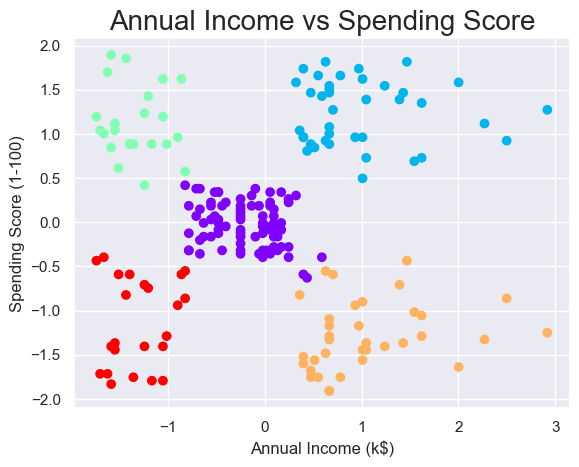

In [323]:
plt.scatter(data_without_age_df['Annual Income (k$)'], data_without_age_df['Spending Score (1-100)'], c=data_without_age_df['cluster_pred'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score', fontsize=20)

**Segmentation with Age and Spending Score**

In [335]:
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)

cluster_prediction_without_income = kmeans_4.fit_predict(data_without_income)

In [336]:
# Convert data_without_age to a DataFrame and add cluster predictions
data_without_income_df = pd.DataFrame(data_without_income, columns=['Age', 'Spending Score (1-100)'])
data_without_income_df['cluster_pred'] = cluster_prediction_without_income

# Display the resulting DataFrame
print(data_without_income_df)

          Age  Spending Score (1-100)  cluster_pred
0   -1.424569               -0.434801             2
1   -1.281035                1.195704             1
2   -1.352802               -1.715913             3
3   -1.137502                1.040418             1
4   -0.563369               -0.395980             2
..        ...                     ...           ...
195 -0.276302                1.118061             1
196  0.441365               -0.861839             3
197 -0.491602                0.923953             1
198 -0.491602               -1.250054             3
199 -0.635135                1.273347             1

[200 rows x 3 columns]


**Scatter plot of Age versus Spending Score colored by cluster predictions**

Text(0.5, 1.0, 'Age vs Spending Score')

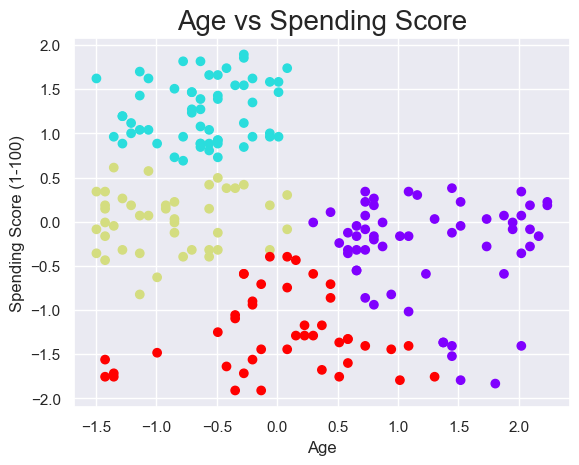

In [337]:
plt.scatter(data_without_income_df['Age'], data_without_income_df['Spending Score (1-100)'], c=data_without_income_df['cluster_pred'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score', fontsize=20)